
#PRAJWAL BS- PES1UG20CS287

#PRANAV KALWAD - PES1UG20CS291

#PURVIK S NUKAL - PES1UG20CS315

#RAHUL RANGANATH - PES1UG20CS316

In [5]:
pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import defaultdict
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from surprise import SVD,Dataset,Reader



# Preprocessing data and EDA

In [7]:
movie=pd.read_csv('/content/movies.csv')
rating=pd.read_csv('/content/ratings.csv')


In [8]:
movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [9]:
rating

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


In [10]:

print(movie.isnull().sum())
print("---------------------")
print(rating.isnull().sum())



movieId    0
title      0
genres     0
dtype: int64
---------------------
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [11]:
#droping the null values in movie df
#replacing ratings which are -1 to nan in rating column in rating df
movie=movie.dropna()
rating.rating.replace(-1, np.NaN,inplace=True)


In [12]:
for text in movie['title']:
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    

In [13]:
#merging movie datafram and ratign df
df=pd.merge(movie,rating,on='movieId',suffixes= ['', '_user'])
df = df.rename(columns={'rating_user': 'user_rating'})
df.head(10)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,5.0,1350206819
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,28,3.0,884098350
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,29,4.0,846942580
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,30,4.5,1292690069
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,4.0,832397496


## variations of ratings by movie genres


In [14]:
fig = px.histogram(df.dropna(subset=['rating']), x='rating', color='genres',
                   histnorm='density', nbins=100, opacity=0.5,
                   barmode='overlay', range_x=[0, 10])
fig.update_layout(xaxis=dict(dtick=2.5))


fig.show()


(0.0, 600.0)

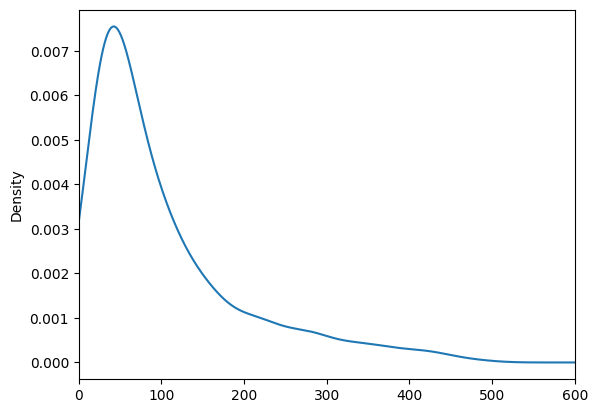

In [15]:
g = rating.groupby('userId').size().reset_index(name='n')
g = g[g['n'] < 500]

# Density plot using matplotlib
fig, ax = plt.subplots()
ax = g['n'].plot.density()
ax.set_xlim(0, 600)


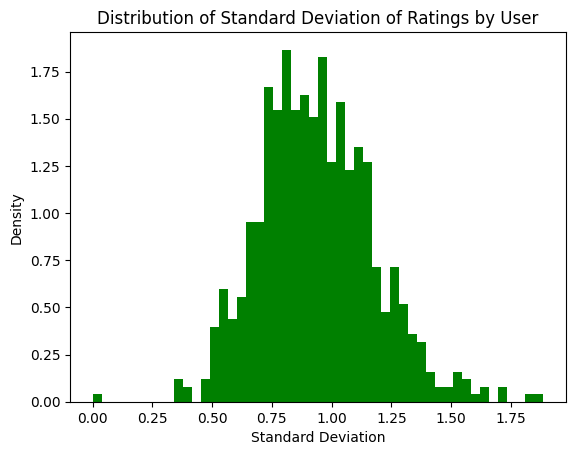

In [16]:
g = rating.groupby('userId')['rating'].std().reset_index(name='sd')
# fig = px.histogram(g, x='sd', nbins=50)
# fig.show()
plt.hist(g['sd'], bins=50, density=True,color="green")
plt.xlabel('Standard Deviation')
plt.ylabel('Density')
plt.title('Distribution of Standard Deviation of Ratings by User')

# Display the plot
plt.show()

Text(0.5, 1.0, 'Distribution of Mean of Ratings by User')

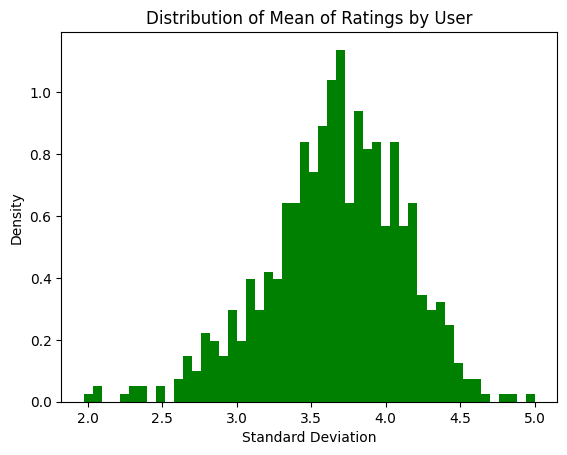

In [17]:
g = rating.groupby('userId')['rating'].mean().reset_index(name='m')
# fig = px.histogram(g, x='sd', nbins=50)
# fig.show()
plt.hist(g['m'], bins=50, density=True,color="green")
plt.xlabel('Standard Deviation')
plt.ylabel('Density')
plt.title('Distribution of Mean of Ratings by User')

In [18]:
combine_movie_rating = df.dropna(axis = 0, subset = ['title'])

In [19]:
combine_movie_rating

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286
...,...,...,...,...,...,...
105334,148238,A Very Murray Christmas (2015),Comedy,475,3.0,1451213043
105335,148626,The Big Short (2015),Drama,458,4.0,1452014749
105336,148626,The Big Short (2015),Drama,576,4.5,1451687664
105337,148626,The Big Short (2015),Drama,668,4.5,1451148148


## Top movies based on rating

Text(0, 0.5, 'User Rating count')

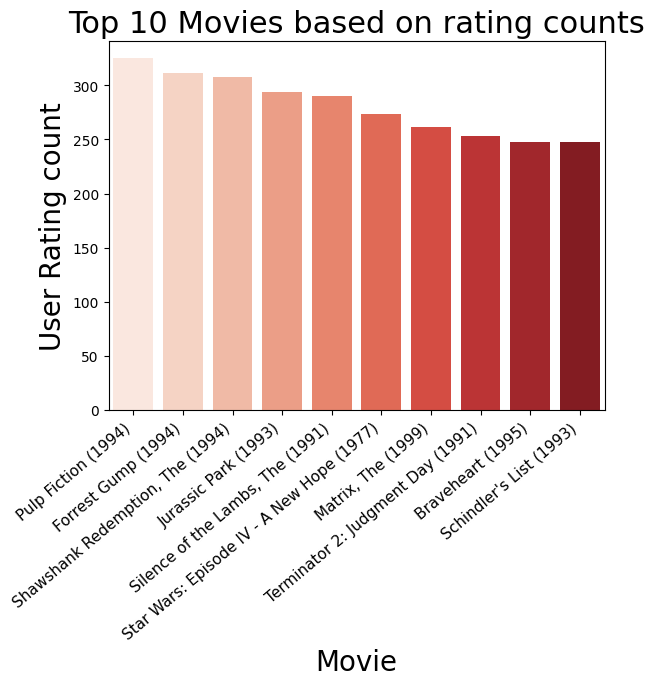

In [20]:
combine_movie_rating = df.dropna(axis=0, subset=['title'])

movie_ratingCount = (combine_movie_rating
                     .groupby(by=['title'])['rating']
                     .count()
                     .reset_index()
                     .rename(columns={'rating': 'totalRatingCount'})[['title', 'totalRatingCount']]
                    )

top10_movieRating = movie_ratingCount[['title', 'totalRatingCount']].sort_values(by='totalRatingCount', ascending=False).head(10)

ax = sns.barplot(x="title", y="totalRatingCount", data=top10_movieRating, palette="Reds")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Movies based on rating counts', fontsize=22)
ax.set_xlabel('Movie', fontsize=20) 
ax.set_ylabel('User Rating count', fontsize=20)


In [21]:
movie_ratings = pd.merge(movie, rating)

# Calculate the average rating for each movie
avg_ratings = movie_ratings.groupby('title')['rating'].mean()

# Sort the movies based on their average rating
sorted_ratings = avg_ratings.sort_values(ascending=False)

# Print the top 10 highest rated movies
print(sorted_ratings.head(10))

title
Saddest Music in the World, The (2003)                          5.0
Interstate 60 (2002)                                            5.0
Gunfighter, The (1950)                                          5.0
Heima (2007)                                                    5.0
Limelight (1952)                                                5.0
Plague Dogs, The (1982)                                         5.0
Love Me If You Dare (Jeux d'enfants) (2003)                     5.0
Syrup (2013)                                                    5.0
Interstella 5555: The 5tory of the 5ecret 5tar 5ystem (2003)    5.0
Symbol (Shinboru) (2009)                                        5.0
Name: rating, dtype: float64


## Popularity of genres

In [22]:
all_genres = all_genres = defaultdict(int)
for i in df['genres']:
    for j in i.split(','):
        all_genres[j.strip()] += 1
all_genres=dict(all_genres)
print(all_genres)
print(type(all_genres))
all_genres = dict(sorted(all_genres.items(), key=lambda x: x[1]))


{'Adventure|Animation|Children|Comedy|Fantasy': 563, 'Adventure|Children|Fantasy': 361, 'Comedy|Romance': 3733, 'Comedy|Drama|Romance': 3033, 'Comedy': 6676, 'Action|Crime|Thriller': 1657, 'Adventure|Children': 165, 'Action': 217, 'Action|Adventure|Thriller': 1683, 'Comedy|Horror': 450, 'Adventure|Animation|Children': 68, 'Drama': 7678, 'Action|Adventure|Romance': 49, 'Crime|Drama': 2436, 'Drama|Romance': 3407, 'Action|Comedy|Crime|Drama|Thriller': 110, 'Comedy|Crime|Thriller': 310, 'Crime|Drama|Horror|Mystery|Thriller': 43, 'Drama|Sci-Fi': 361, 'Children|Drama': 245, 'Adventure|Drama|Fantasy|Mystery|Sci-Fi': 45, 'Mystery|Sci-Fi|Thriller': 280, 'Adventure|Romance|IMAX': 1, 'Drama|War': 1294, 'Action|Crime|Drama': 325, 'Action|Adventure|Fantasy': 615, 'Comedy|Drama|Thriller': 93, 'Mystery|Thriller': 604, 'Animation|Children|Drama|Musical|Romance': 110, 'Crime|Mystery|Thriller': 532, 'Adventure|Drama': 419, 'Children|Comedy': 568, 'Drama|Mystery': 394, 'Drama|Thriller': 1595, 'Comedy|Cri

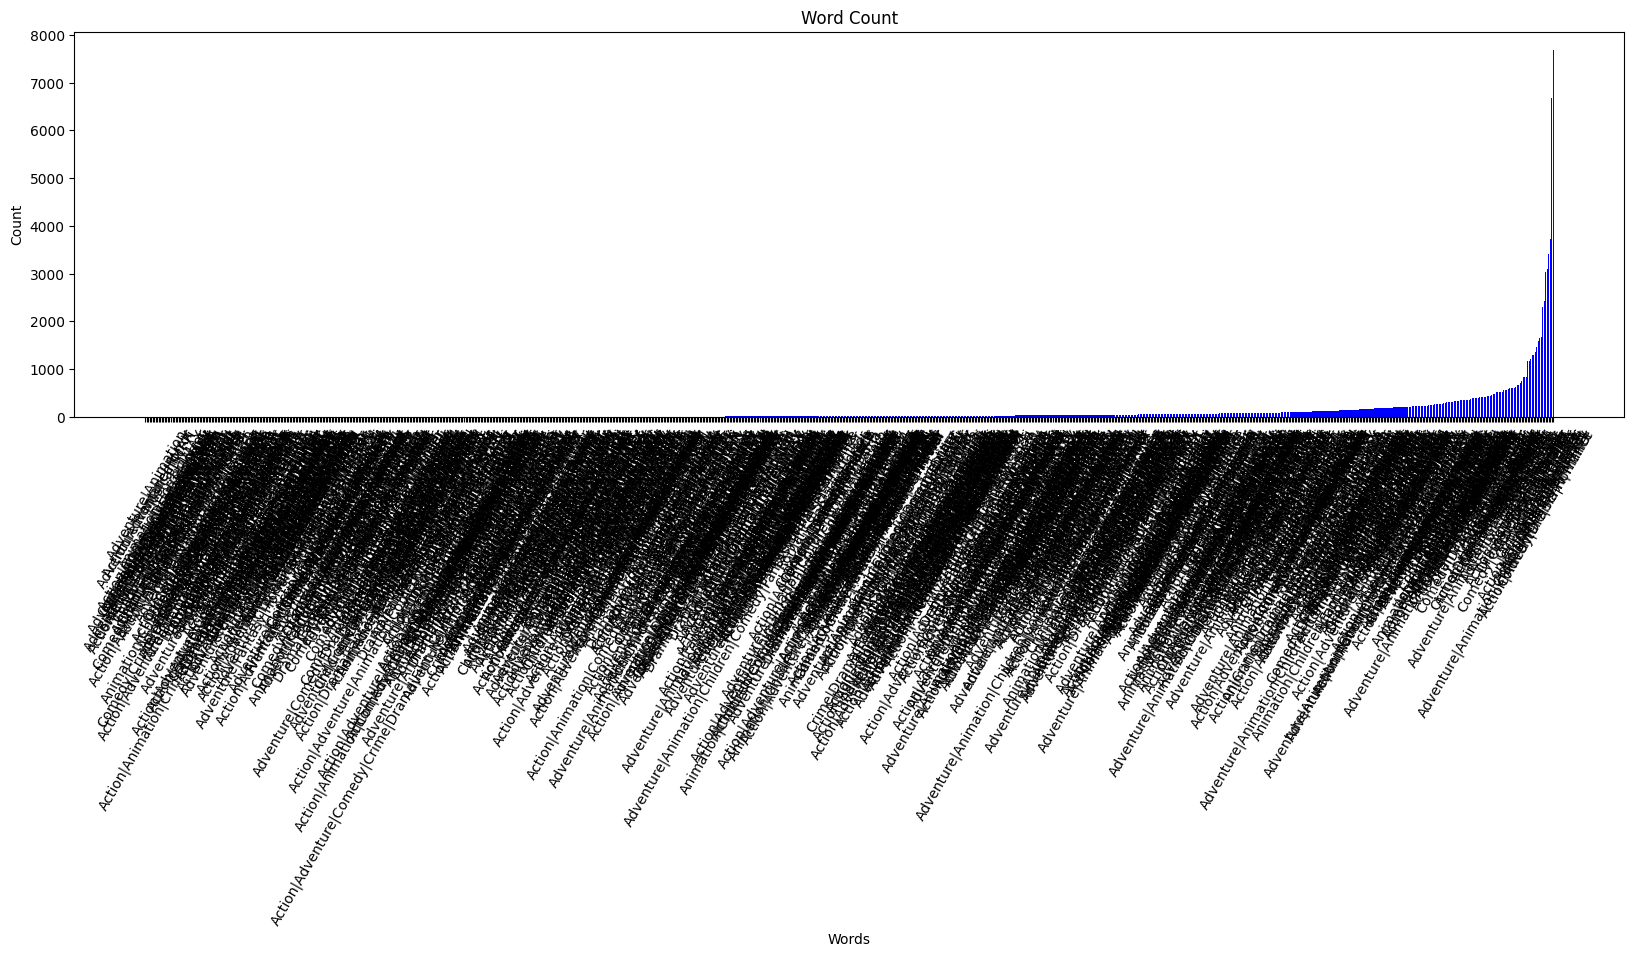

In [23]:

keys = list(all_genres.keys())
values = list(all_genres.values())
plt.figure(figsize=(20, 5))
plt.bar(keys, values, color='blue')
plt.title("Word Count")
plt.xlabel("Words")
plt.ylabel("Count")
plt.xticks(rotation=60)
plt.show()

# Collaborative Filtering

Collaborative filtering can be done using creating a pivot table, since the data is huge it takes lot of time to create the pi

In [24]:
df_collab=df[['userId', 'title', 'rating']]
df_collab=df_collab.dropna()
df_collab= df_collab[df_collab.userId <= 20000]


In [25]:
df_collab=df[['userId', 'title', 'rating']]
# df_collab=df_collab.dropna()
df_collab= df_collab[df_collab.userId <= 20000]
#creating pivot table
pivot_table= df_collab.pivot_table(index=['userId'], columns=['title'], values='rating')

#normalizing
normalised_pivot_table = pivot_table.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)
# Drop all columns containing only zeros representing users who did not rate
normalised_pivot_table.fillna(0, inplace=True)
normalised_pivot_table = normalised_pivot_table.T
normalised_pivot_table = normalised_pivot_table.loc[:, (normalised_pivot_table != 0).any(axis=0)]
#converting pivot table into sparse matrix
sparse_matrix = csr_matrix(normalised_pivot_table.values)
#getting item_similaroty anf user similarity
item_similarity = cosine_similarity(sparse_matrix)
user_similarity = cosine_similarity(sparse_matrix.T)

#make item and user similarity matrices into df
item_sim_df = pd.DataFrame(item_similarity, index = normalised_pivot_table.index, columns = normalised_pivot_table.index)
user_sim_df = pd.DataFrame(user_similarity, index = normalised_pivot_table.columns, columns = normalised_pivot_table.columns)





In [26]:
def collaborative_filtering_recommendation(movie_name,top_n):
    count = 1
    print('Similar shows to {} include:\n'.format(movie_name))
    for item in item_sim_df.sort_values(by = movie_name, ascending = False).index[1:top_n+1]:
        print('No. {}: {}'.format(count, item))
        count +=1  

In [27]:
collaborative_filtering_recommendation('The Big Short (2015)',10)


Similar shows to The Big Short (2015) include:

No. 1: Calvary (2014)
No. 2: You Don't Know Jack (2010)
No. 3: Arbitrage (2012)
No. 4: Rush (2013)
No. 5: Sea Inside, The (Mar adentro) (2004)
No. 6: Stranger, The (1946)
No. 7: Duellists, The (1977)
No. 8: Somebody Up There Likes Me (1956)
No. 9: Naked City, The (1948)
No. 10: Sleepless Night (Nuit blanche) (2011)


# Content Based recomendation


In [28]:
movie_features=movie[['genres']].astype('str')
movie_features["genres"]
movie_features["genres"]=movie_features["genres"].str.split(',').str.join(' ')
movie_features

,genres
0,Adventure|Animation|Children|Comedy|Fantasy
1,Adventure|Children|Fantasy
2,Comedy|Romance
3,Comedy|Drama|Romance
4,Comedy
...,...
10324,Animation|Children|Comedy
10325,Comedy
10326,Comedy
10327,Drama


In [29]:
#creating tf-idf 
tf_idf = TfidfVectorizer(stop_words='english')
movie_matrix = tf_idf.fit_transform(movie_features.apply(lambda x: ' '.join(x), axis=1))
cosine_similarities = cosine_similarity(movie_matrix)   #creating cosine similarity
#creating a list which contains all movie names
movie_names=movie["title"]
indices = pd.Series(movie.index, index=movie['title'])

In [30]:
def get_recommendations(movie_name,k):
    idx = indices[movie_name]
    # Get the pairwise similarity scores
    sim_scores = list(enumerate(cosine_similarities[idx]))
    # Sort the movie based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of the k most similar movie
    sim_scores = sim_scores[1:k+1]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top k most similar movie
    return movie_names.iloc[movie_indices]

In [31]:
get_recommendations("Toy Story (1995)",10)

1815                                          Antz (1998)
2496                                   Toy Story 2 (1999)
2967       Adventures of Rocky and Bullwinkle, The (2000)
3166                     Emperor's New Groove, The (2000)
3811                                Monsters, Inc. (2001)
6617    DuckTales: The Movie - Treasure of the Lost La...
6997                                     Wild, The (2006)
7382                               Shrek the Third (2007)
7987                       Tale of Despereaux, The (2008)
9215    Asterix and the Vikings (Astérix et les Viking...
Name: title, dtype: object